# 단순 선형회귀

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://www.randomservices.org/random/data/Galton.txt',
sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


## - 아버지와 아들의 키만 발췌하고 단위를 cm으로 변환

In [4]:
df = df[df.Gender == 'M']
height = df[['Father','Height']].rename(columns={'Height':'Son'})
height.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [5]:
height = height * 2.54
height.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


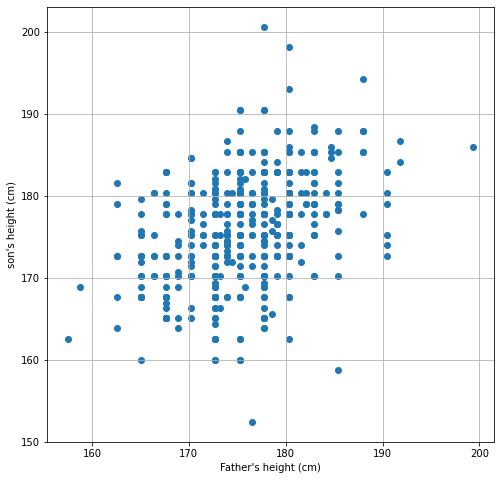

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("son's height (cm)")
plt.grid()
plt.show()

## - Numpy 최소 자승법을 이용해 회귀선 구하기

In [7]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [8]:
height.Father.shape

(465,)

In [9]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [10]:
# 기울기와 절편
m,c = reg[0]

In [11]:
# 잔차 제곱의 합 (Residual Sum of Square)
rss = reg[1][0]

In [12]:
m,c,rss

(0.44774791760302285, 97.1776370073939, 17556.599515494014)

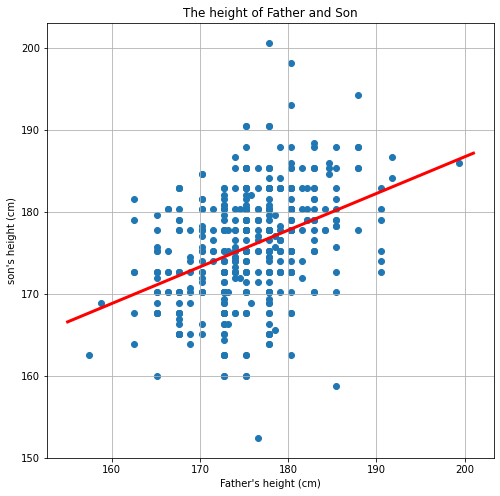

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son)
plt.plot([155,201],[m*155+c,m*201+c],'r',lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("son's height (cm)")
plt.grid()
plt.show()

# - Scikit-Learn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# svc.fit(X_train, y_train) -> (120,4) (120 )
# (465,) -> (465, 1) 바꿔야 에러 안남
height.Father.values.shape

(465,)

In [16]:
X = height.Father.values.reshape(-1,1)
y = height.Son.values

In [17]:
X.shape, y.shape

((465, 1), (465,))

In [18]:
lr = LinearRegression()
lr.fit(X,y)   # X는 2D array이어야 함

LinearRegression()

In [20]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss
# numpy의 최소 자승법으로 구한 값 = sklean의 단순회기로 구한 값

(0.4477479176030255, 97.17763700739346, 17556.59951549399)

In [21]:
# R squared(결정계수)
lr.score(X,y)

0.15312927478306992